_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Comando para cargar el drive en el sistema y poder usar el archivo AIR+Quality

In [ ]:
## cargar el dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

df = pd.read_csv("/content/drive/MyDrive/Unir/TAA/Actividad1/AirQualityUCI.csv", low_memory=False, delimiter=';',
usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
)
print(df)

            Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1     10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2     10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3     10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4     10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   
...          ...       ...    ...          ...       ...      ...   
9466         NaN       NaN    NaN          NaN       NaN      NaN   
9467         NaN       NaN    NaN          NaN       NaN      NaN   
9468         NaN       NaN    NaN          NaN       NaN      NaN   
9469         NaN       NaN    NaN          NaN       NaN      NaN   
9470         NaN       NaN    NaN          NaN       NaN      NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0     

### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [ ]:
## ¿cuántas instancias tiene el dataset?

Se puedén observar 9471 filas en el archivo

In [ ]:
## ¿cuál es el tipo de datos de cada una de las columnas?
# Función para clasificar tipos de datos
def clasificar_tipos_datos(df):
    tipos_datos = {}

    for columna, tipo in df.dtypes.items():
        if pd.api.types.is_datetime64_any_dtype(tipo):
            tipos_datos[columna] = 'Fecha/Hora'
        elif pd.api.types.is_float_dtype(tipo):
            tipos_datos[columna] = 'Flotante'
        elif pd.api.types.is_integer_dtype(tipo):
            tipos_datos[columna] = 'Entero'
        elif pd.api.types.is_object_dtype(tipo):
            tipos_datos[columna] = 'Categórico/Texto'
        else:
            tipos_datos[columna] = 'Otro'

    return tipos_datos

# Clasificar los tipos de datos
tipos_datos = clasificar_tipos_datos(df)

# Mostrar los resultados
print("Tipos de datos por columna:")
for columna, tipo in tipos_datos.items():
    print(f"{columna}: {tipo}")

print(df.dtypes)
df.info()
df.describe()
df.head()


Tipos de datos por columna:
Date: Categórico/Texto
Time: Categórico/Texto
CO(GT): Categórico/Texto
PT08.S1(CO): Flotante
NMHC(GT): Flotante
C6H6(GT): Categórico/Texto
PT08.S2(NMHC): Flotante
NOx(GT): Flotante
PT08.S3(NOx): Flotante
NO2(GT): Flotante
PT08.S4(NO2): Flotante
PT08.S5(O3): Flotante
T: Categórico/Texto
RH: Categórico/Texto
AH: Categórico/Texto
Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time      

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


_indica aquí tu respuesta_

In [ ]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?

_indica aquí tu respuesta_

In [ ]:
## ¿existen valores nulos en el dataset?
# Contar valores nulos por columna
valores_nulos_por_columna = df.isnull().sum()

# Mostrar los resultados
print("Cantidad de valores nulos por columna:")
for columna, cantidad_nulos in valores_nulos_por_columna.items():
    print(f"{columna}: {cantidad_nulos} valores nulos")

Cantidad de valores nulos por columna:
Date: 114 valores nulos
Time: 114 valores nulos
CO(GT): 114 valores nulos
PT08.S1(CO): 114 valores nulos
NMHC(GT): 114 valores nulos
C6H6(GT): 114 valores nulos
PT08.S2(NMHC): 114 valores nulos
NOx(GT): 114 valores nulos
PT08.S3(NOx): 114 valores nulos
NO2(GT): 114 valores nulos
PT08.S4(NO2): 114 valores nulos
PT08.S5(O3): 114 valores nulos
T: 114 valores nulos
RH: 114 valores nulos
AH: 114 valores nulos


_indica aquí tu respuesta_

In [ ]:
## ¿cuál es la variable respuesta?¿de qué tipo es?

_indica aquí tu respuesta_

Axes(0.125,0.11;0.775x0.77)
     CO(GT)  NOx(GT)  NO2(GT)
0       2,6    166.0    113.0
1         2    103.0     92.0
2       2,2    131.0    114.0
3       2,2    172.0    122.0
4       1,6    131.0    116.0
...     ...      ...      ...
9466    NaN      NaN      NaN
9467    NaN      NaN      NaN
9468    NaN      NaN      NaN
9469    NaN      NaN      NaN
9470    NaN      NaN      NaN

[9471 rows x 3 columns]


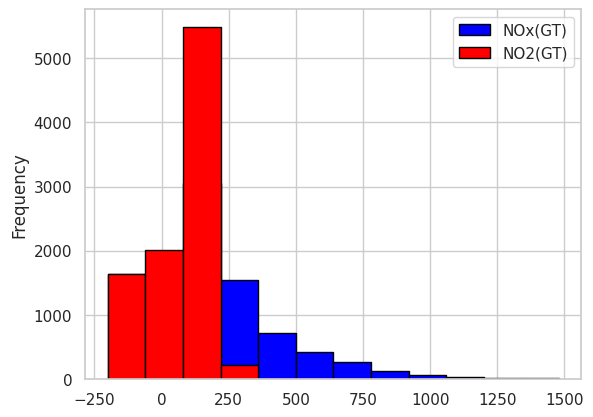

In [ ]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2?

df1 = pd.read_csv("/content/drive/MyDrive/Unir/TAA/Actividad1/AirQualityUCI.csv", low_memory=False, delimiter=';',
usecols=['CO(GT)', 'NOx(GT)', 'NO2(GT)']
)
colors = ['blue', 'red', 'yellow']
histogram1 = df1.plot.hist(bins= 12, edgecolor='black', color = colors )
print(histogram1)
print(df1)

_indica aquí tu respuesta_

¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

_indica aquí tu respuesta_

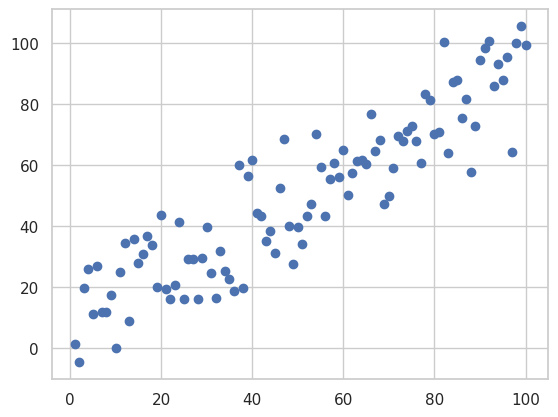

    x_values    y_values
0          1    1.474046
1          2   -4.588221
2          3   19.753472
3          4   25.911363
4          5   11.135610
..       ...         ...
95        96   95.488106
96        97   64.147347
97        98   99.960353
98        99  105.639582
99       100   99.361090

[100 rows x 2 columns]


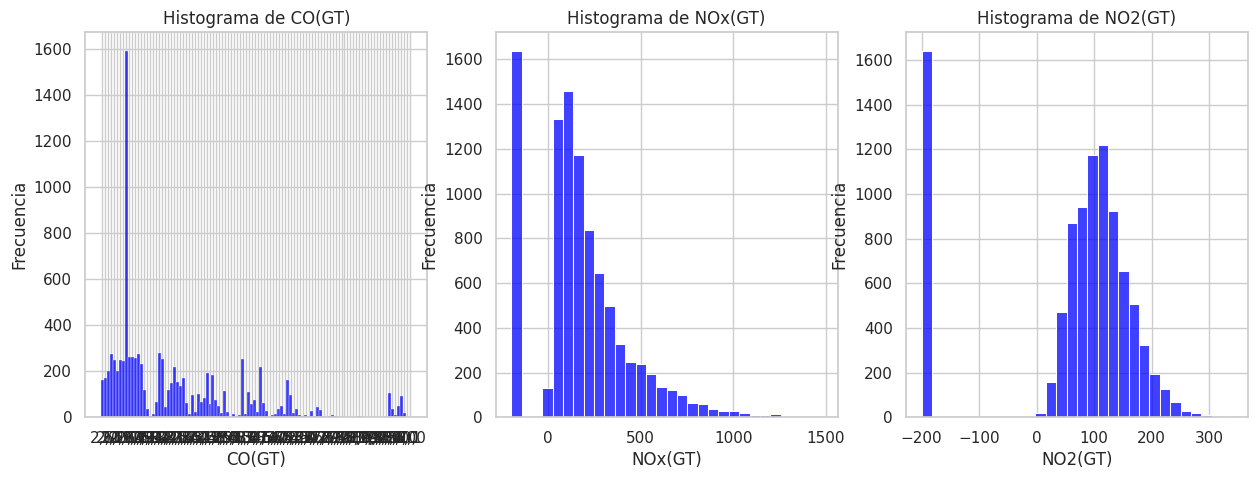

In [ ]:
df2=pd.DataFrame({'x_values':range(1,101),'y_values':np.random.randn(100)*15+range(1,101) })
plt.plot( 'x_values', 'y_values', data=df2, linestyle='none', marker='o')
plt.show()
print(df2)

# Comprobar si las columnas existen en el DataFrame
columnas_interes = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']

for columna in columnas_interes:
    if columna not in df1.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un histograma para cada variable
plt.figure(figsize=(15, 5))

for i, columna in enumerate(columnas_interes, start=1):
    plt.subplot(1, 3, i)  # 1 fila, 3 columnas, i-th gráfico
    sns.histplot(df1[columna].dropna(), bins=30, kde=False, color='blue')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)

#plt.tight_layout()  # Ajustar el espaciado entre gráficos
plt.show()

In [ ]:
## ¿cómo son las correlaciones entre las variables del dataset?

_indica aquí tu respuesta_

In [ ]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?

_indica aquí tu respuesta_

In [ ]:
## ¿existe alguna variable que no tenga correlación?

_indica aquí tu respuesta_

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

_indica aquí tu respuesta_

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame


scaler = StandardScaler()

X_train = DataFrame(scaler.fit_transform(X_train))
X_test = DataFrame(scaler.fit_transform(X_test))

In [ ]:
# separar datos de entrenamiento y test

In [ ]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

In [ ]:
# entrena el modelo con los datos de entrenamiento

In [ ]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

Explica qué indican estos parámetros

_indica aquí tu respuesta_

In [ ]:
# realiza las predicciones para el conjunto de datos de test

In [ ]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

_indica aquí tu respuesta_

In [ ]:
# ¿Qué error tiene el modelo? Explícalo.

_indica aquí tu respuesta_

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

_indica aquí tu respuesta_

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

Calcula MAE, R2 y RMSLE

¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

_indica aquí tu respuesta_

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.